## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №2

Задание выполнил(а): _(впишите свои фамилию и имя)_

### Общая информация

__Дата выдачи:__ 04.03.2019

__Дедлайн:__ 23:59 17.03.2019

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2.5. Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-2: zCH4F32

# kNN своими руками (4)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$, а $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

Сверьте для нескольких комбинаций различных параметров свой результат на искусственной выборке с результатом соответствующего алгоритма из `sklearn` по метрике качества MSE.

In [235]:
class KNN:
    def __init__(self, metric='minkowski', k = 5, p =2):
        """
        PARAMETERS:
        metric ('euclidean' or 'manhattan')
        k - number of nearest neighbors
        p - metric (p=2 if euclidean, p = 1 if manhattan)
        """
        self.metric = metric
        self.k = k
        self.X_train = None
        self.y_train = None
        self.p = p
        
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    
    def predict(self, X_test):
        predictions = []
        
        for row in X_test:
            distances = []
            for i, el in enumerate(self.X_train):
                dist = minkowski(row, el, self.p)
                distances.append((self.y_train[i], dist))
                
            distances.sort(key = lambda x: x[1])
            
            v = 0
            total_weight = 0
            for i in range(self.k):
                weight = 1/distances[i][1]
                v += distances[i][0] * weight
                total_weight += weight
            
            predictions.append(v/total_weight)
            
            
        return np.asarray(predictions)

In [236]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

In [237]:
knn = KNN(p =1)
knn.fit(X_train, y_train)
a = knn.predict(X_test)

In [238]:
knt = KNeighborsRegressor(weights='distance', p = 1)
knt.fit(X_train, y_train)
model2 = knt.predict(X_test)

In [239]:
print(mean_squared_error(y_test, a))
print(mean_squared_error(y_test, model2))


1.1768254941187883
1.1768254941187883


# Линейная регрессия своими руками (4)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

In [240]:
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent
        """
        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        self.w = None
        self.loss_history = None
        
        
    def fit(self, X_train, y_train):
        
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        loss_history = np.zeros(self.max_iter)
        self.w = np.zeros(X_train.shape[1])
        iterations = 0
        while iterations < self.max_iter:
            gradient = self.calc_gradient(X_train, y_train)
            new_w = self.w - ((self.eta/len(X_train)) * gradient)
            
            if np.sum(abs(new_w - self.w)) <= self.tol:
                break
            
            loss_history[iterations] = self.calc_loss(X_train, y_train)
            self.w = new_w
            iterations += 1
            
        self.loss_history = loss_history
        return self.loss_history
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return X_test @ self.w.T
    
   
    
    def calc_gradient(self, X, y):
        
        matrix = np.where(np.abs(y - X @ self.w ) <= self.delta, 
                          -(y - X @ self.w), 
                          -self.delta * (y - X @ self.w)/np.abs((y - X @ self.w)))
        grad = np.zeros(X.shape[1])
        for i in range(X.shape[1]):
            grad[i] = X[:, i].T @ matrix
        return grad
    
   
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        """
        loss = np.where(np.abs(y - X @ self.w) <= self.delta, 
                        0.5*((y - X @ self.w)**2), 
                        self.delta * np.abs(y - X @ self.w.T) - 0.5*(self.delta**2))
       
        return (np.sum(loss))/len(X)

In [241]:
ln = LinearRegressionHuber()
ln.fit(X_train, y_train)
ln_pr = ln.predict(X_test)

In [242]:
ln_h = HuberRegressor()
ln_h.fit(X_train, y_train)
ln_h_pr = ln_h.predict(X_test)
ln_h.scale_

0.633256927793413

In [243]:
print(mean_squared_error(y_test, ln_pr))
print(mean_squared_error(y_test, ln_h_pr))

1.0919524307479427
1.095104163225779


Text(0.5, 1.0, 'Error vs. Training Epoch')

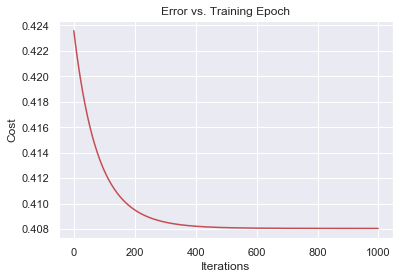

In [244]:
fig, ax = plt.subplots()  
ax.plot(np.arange(1000), ln.fit(X_train, y_train), 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Costs')  
ax.set_title('Huber loss with each iterations')

# Практика

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.spatial.distance import minkowski

from sklearn.metrics import accuracy_score
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [2]:
data = pd.read_csv('train.csv', header=0)

In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.drop('Id', axis=1, inplace=True)

## 1 (1)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data[missing_data['total'] >= 1]

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Посмотрим на корреляцию: 

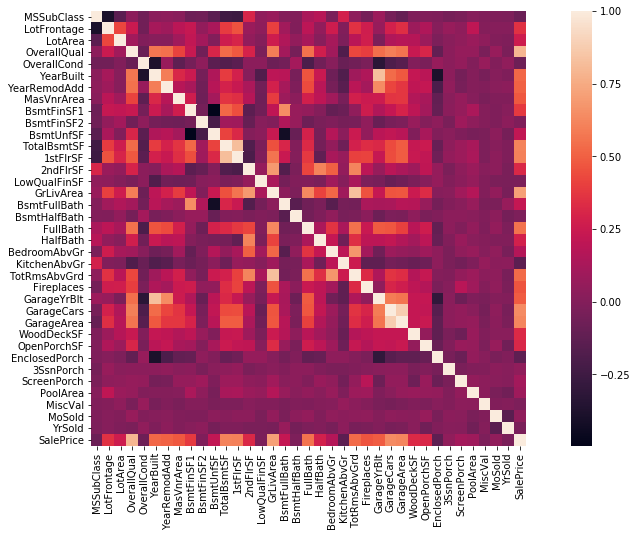

In [6]:
corr_of_data = data.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_of_data, square=True);

Из полученной таблицы можно увидеть, что колонки PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage можно будет удалить, поскольку количество пропусков больше 15%, и они не несут большой значимости при выборе квартиры. Также у колонок GarageType, GarageCond, GarageFinish, GarageQual, GarageYrBlt имеют одинаковое количество пропусков, откуда можно предположить, что данные одинаковые проверим это (выбираю колонку SalePrice, поскольку в ней нет пропусков):

In [7]:
obs_col1 = ['GarageType', 'GarageCond', 'GarageFinish', 'GarageQual']
data[data['GarageType'].isnull()
         & data['GarageCond'].isnull() 
         & data['GarageFinish'].isnull() 
         & data['GarageQual'].isnull()].count()['SalePrice']

81

Откуда мы видим, что количество значений равно количеству, представленное в таблице, также мы можем удалить эти столбцы, поскольку основная информация хранится в GarageCars. 

Посмотрим теперь на количество объектов со значением Nan в BsmtFinType2 и в BsmtExposure, а также в BsmtQual, BsmtCond, BsmtFinType1:

In [8]:
data[data['BsmtFinType2'].isnull()
         & data['BsmtExposure'].isnull()].count()['SalePrice']

37

In [9]:
data[data['BsmtQual'].isnull()
         & data['BsmtCond'].isnull()
     & data['BsmtFinType1'].isnull()].count()['SalePrice']

37

Откуда мы видим, что количество значений отличается на 1 количеству, представленное в таблице, также мы можем удалить эти столбцы, поскольку основная информация хранится в TotalBsmtSF. 

Посмотрим на MasVnrArea и MasVnrType - они не существенны для прогнозирования, поэтому мы можем их удалить.
А  объект  с пропуском в Electric можно удалить - от этого ничего не изменится.

## 2 (1)

Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [10]:
data = data.drop((missing_data[missing_data['total'] > 1]).index, 1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max()

0

Расммотрим дата_сет на наличие выбросов:

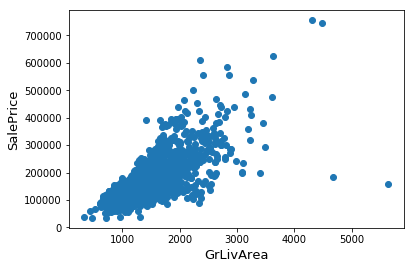

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Выбросами на данной гистограмме будут две точки, показывающие большую площадь при сравнительно низкой цене. Поэтому сразу же удалим их.

In [12]:
data = data.drop(data[(data['GrLivArea'] > 4000) & (data ['SalePrice'] < 300000)].index)

## 3 (1)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Найдём категориальные признаки и посмотрим на них: 

In [13]:
cat_features = data.select_dtypes(include = ["object"]).columns
data[cat_features].head(10)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,Wood,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
7,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
8,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,...,BrkTil,GasA,Gd,Y,FuseF,TA,Min1,Y,WD,Abnorml
9,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,...,BrkTil,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal


In [14]:
data[cat_features].columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Проанализируем каждый категориальный признак:
`MSZoning` показывает основную зону классификацию, поэтому нельзя однозначно увидеть ранжирование признака - используем one-hot-coding (далее ohc)
`Street` - тип подъездной дороги к собственности, асфальтированная дорога к дому косвенно влияет на цену - label encoding 
`LotShape` - общая форма собственности. Наверное, лучше показать ранжированность - label encoding
`LandContour` - ровность территории. Не ясно, как ранжировать и, наверное, субъективно определенно - ohc
`Utilities` - доступные условия проживания. Проранжируем самостоятельно от доступных условий (1 - есть только электричество, ..., 4 - доступны все условия) !!!!!
`LotConfig` - конфигурация лота. Сложно определить какую-то ранжировку - ohc
`LandSlope` - можно проранжировать - label encoding
`Neighborhood` - не понятно, как ранжировать - ohc
`Condition1` - нельзя в самом начале определить какие условия будут значимее остальных - ohc
`Condition2` - аналогично - ohc 
`BldgType` - сложно дать ранжировку - ohc
`HouseStyle` - не ясно, как это влияет - ohc
`RoofStyle` - аналогично
`RoofMatl` - наверное, материал крыши должен как-то влиять на цену дома/верхних этажей, но определить сложно
`Exterior1st` - сложно ранжировать - ohc
`Exterior2nd` - аналогично - ohc
`ExterQual` - явная ранжировка - label encoding
`ExterCond` - явная ранжировка - label encoding
`Foundation` - не ясна ранжировка-  ohc
`Heating` - сложно самостоятельно понять, что луше обогревает - ohc
`HeatingQC` - качество (ранжировка) - label encoding
`CentralAir` - бинарный признак  - ohc
`Electrical` - непонятно, как ранжировать - ohc
`KitchenQual` - ранжировка - ohc
`Functional` - непонятно, как ранжировать - ohc
`PavedDrive` - аналогично со "Street" - ohc
`SaleType` - не ясна ранжировка - ohc
`SaleCondition` - сложно определить ранжированность - ohc

Для обозначенных как label encoding проделаем Label Encoding, для многих остальных применим get_dummies()


In [15]:
data = data.replace({'Utilities': {'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4 } })

In [16]:
cols = ('Street', 'MSSubClass', 'LotShape', 'LandSlope',  'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir',
        'KitchenQual', 'PavedDrive')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

Добавим несколько признаков до разделения на выборки:

In [17]:
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

## 4 (0.5)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.* 


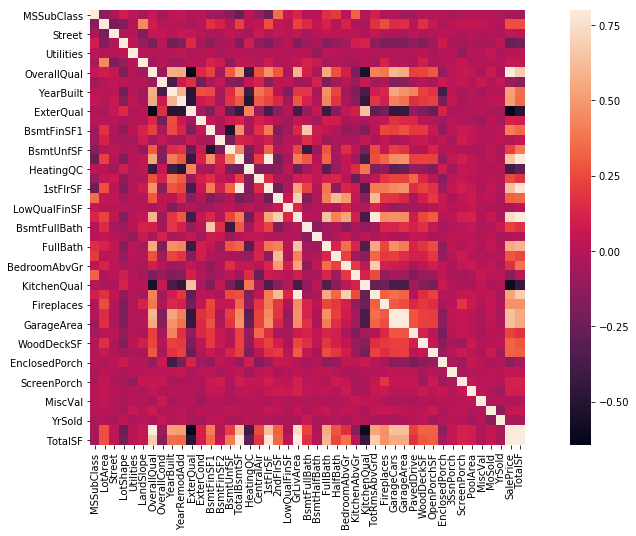

In [18]:
corr_of_data = data.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(corr_of_data, vmax=0.8, square=True);

Можно увидеть, что предсказываемый признак сильно коррелирует с OverallQual, TotalBsmtSF, YearBuilt, GrLivArea, GarageCars. А также же есть сильно коррелирующие признаки GarageArea и GarageCars, поэтому первый мы и удалили.

In [19]:
data = pd.get_dummies(data)

## 5 (0.5)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [20]:
cols = (np.abs(corr_of_data.nlargest(len(data.columns), 'SalePrice')['SalePrice'])).sort_values(ascending = False)
max_feature_v = cols[1]
min_feature_v = cols[-1]
max_feature = cols.index[1]
min_feature = cols.index[-1]

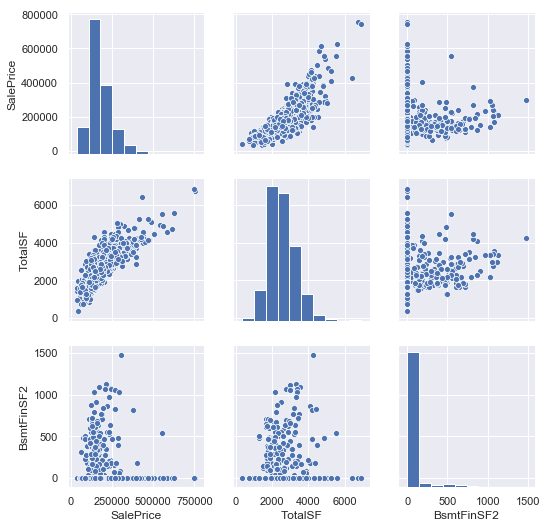

In [21]:
sns.set()
cols_of_min_max_features = ['SalePrice', max_feature, min_feature]
sns.pairplot(data[cols_of_min_max_features], size = 2.5)
plt.show()

## 6 (0.5)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

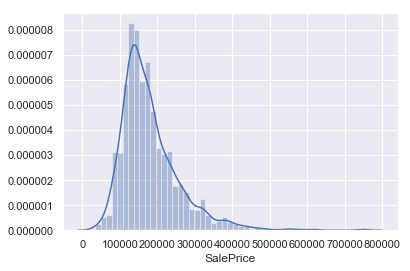

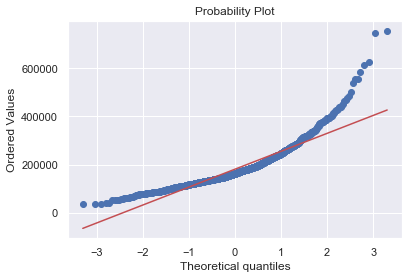

In [22]:
sns.distplot(data['SalePrice'],);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [23]:
data['SalePrice'] = np.log1p(data['SalePrice'])

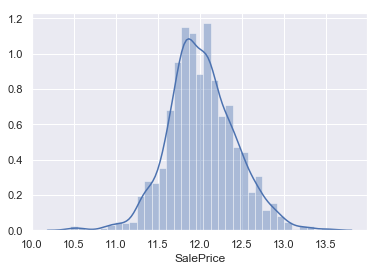

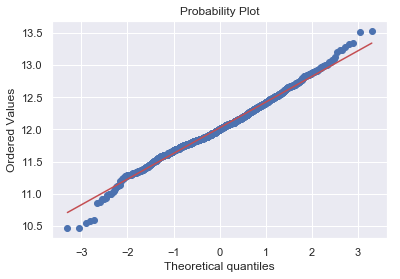

In [24]:
sns.distplot(data['SalePrice']);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

Если на первой гистограмме мы видим, что распределение цен далеко от нормального, то уже на второй мы отчетливо видим нормальное. Подсказкой в дальнейшем изучении служит построение график нормального распределения: на первом мы видим сильное отклонение от прямой, что подскажет нам о применении логарифмирования.

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [25]:
y = data["SalePrice"]
X = data.drop("SalePrice", axis = 1)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=17032019)

In [27]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1092, 196), (365, 196), (1092,), (365,))

## 7 (2)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

In [28]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=17032020)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [39]:
def SearchHyper(model, params):
    kf = KFold(n_folds, shuffle=True, random_state=17032021)
    clf = GridSearchCV(model, params, cv = kf, scoring='neg_mean_squared_error')
    clf.fit(X,y)
    return  clf

In [40]:
params = {'n_neighbors': np.arange(1, 51, 2), 'weights': ['uniform', 'distance'], 
          "metric": ["euclidean", "cityblock"]}
knn = KNeighborsRegressor()
best_params_knn = SearchHyper(knn, params)

In [41]:
knn_best = KNeighborsRegressor(n_neighbors =  best_params_knn.best_params_.get('n_neighbors'),
                               metric = best_params_knn.best_params_.get('metric'), 
                               weights = best_params_knn.best_params_.get('weights') )
score_knn = rmsle_cv(knn_best)
score_knn.mean()

0.20319223363708336

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = rmsle_cv(lr)
score.mean()

0.12460043063090265

In [43]:
params = {'alpha': [0, 0.0005, 0.001, 0.002, 0.003, 1], 
            'max_iter': [25000, 50000, 60000]}

lasso = Lasso()
best_params_lass = SearchHyper(lasso, params)

In [44]:
lasso_best =  Lasso(alpha = best_params_lass.best_params_.get('alpha'),
                   max_iter = best_params_lass.best_params_.get('max_iter'))
lasso_best.fit(X_train, y_train)
score = rmsle_cv(lasso_best)
score.mean()


0.11379439156775946

In [45]:
params = {'alpha': [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75],
         'max_iter': np.arange(20000, 70000, 10000)}
ringe = Ridge()

best_params_ringe = SearchHyper(ringe, params)

In [46]:
best_ringe = Ridge(alpha = best_params_ringe.best_params_.get('alpha')
                   , max_iter= best_params_ringe.best_params_.get('max_iter'))
best_ringe.fit(X_train, y_train)
score = rmsle_cv(best_ringe)
score.mean()

0.11515114571010902

## 8 (1)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

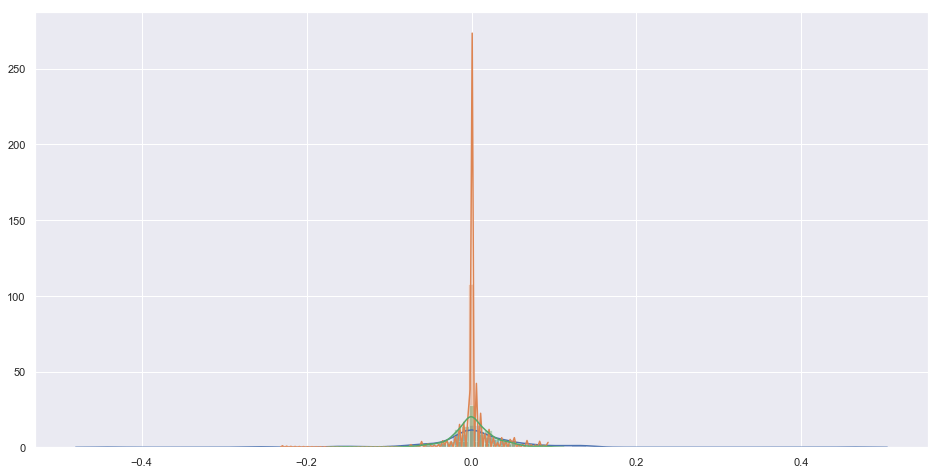

In [47]:
f, ax = plt.subplots(figsize=(16, 8))
sns.distplot(lr.coef_);
sns.distplot(lasso_best.coef_)
sns.distplot(best_ringe.coef_);

Данная гистограмма показывает чувствительность линейной регрессии и L1-регуляризации к масштабированию и выбросам.

## 9 (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [48]:
np.sqrt(mean_squared_error(lasso_best.predict(X_val), y_val))

0.11709633517561627

## 10* (0.5)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

## 11* (0.5)

По аналогии с первым домашним заданием, вы можете получить бонус за отправку посылки в соревнование на Kaggle. Не забудьте преобразовать тестовые данные так же, как и обучающую выборку, а также сделать обратное преобразование целевой переменной относительно логарифмирования (с помощью `numpy.expm1`). Запишите ваш результат, а также при сдаче задания в Anytask прикрепите скриншот вашего положения в таблице участников.

In [ ]:
# your code here

Результат семинариста: 0.13105

Ваш результат: ...

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

*(your solution here)*

## 2* (0.5)

Гарри Поттер хочет найти философский камень, расположенный в точке минимума функции $f(x_1, x_2)=x_1^2 + x_2^2$. В момент времени 0 он стартует из точки $x^{(0)}=(2, 2)$. На $i$-й минуте Гарри мгновенно перемещается (аппарирует) из точки $x^{(i)}$ в точку

$$
x^{(i+1)} = x^{(i)} - \eta \nabla f(x^{(i)}),
$$

где $\nabla f(x^{(i)})$ — градиент $f$ в точке $x^{(i)}$, $\eta \ge 0$ — фиксированное число. Опишите судьбу Гарри в зависимости от значения $\eta$. При каких значениях $\eta$ Гарри подойдёт к философскому камню сколь угодно близко? Сколько итераций ему понадобится, чтобы подойти к философскому камню на расстояние не больше $\varepsilon$?

*(your solution here)*

## 3* (0.5)

Рассмотрим задачу обучения линейной регрессии:

$$
Q(w) = \frac{1}{2}(y - Xw)^T(y - Xw) \to \min_w
$$

Будем решать ее с помощью градиентного спуска. Допустим, мы находимся на некоторой итерации $k$ и хотим выполнить очередной шаг

$$
w^{(k)} = w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)
$$

При известных $y$, $X$ и $w^{(k - 1)}$ найдите длину шага $\eta$, при которой уменьшение значения функционала будет наибольшим:

$$
Q\left(w^{(k - 1)} - \eta\nabla_wQ\left(w^{(k - 1)}\right)\right) \to \min_\eta
$$

*Примечание 1. $\nabla_wQ = -X^T\left(y - Xw\right)$.*

*Примечание 2. Для получения лаконичного ответа вам, возможно, поможет следующее свойство скалярного произведения. Пусть $x_1$, $x_2$ - вектора, а $A$ - матрица. Тогда выполняется равенство:*

$$
\langle x_1, Ax_2\rangle = \langle A^Tx_1, x_2\rangle
$$

*Это верно потому, что $\langle x_1, Ax_2\rangle = x_1^TAx_2 = \left(A^Tx_1\right)^Tx_2 = \langle A^Tx_1, x_2\rangle$.*

*(your solution here)*